# Libraries Imported

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Loading and Data Understanding

In [2]:
df = pd.read_csv('listings3.csv')

In [3]:
#Removing '$' from price column.
df['price'] = df.price.str.lstrip('$').str.replace(',', '').astype('float')

# Exploratory Data Analysis (EDA)

# To visualize that where to invest in a property in Athens to get the maximum number of returns from Airbnb.

Neighbourhood and Average Price comparison.

In [4]:
print(df['neighbourhood_cleansed'])

0                            ΑΜΠΕΛΟΚΗΠΟΙ
1                            ΑΜΠΕΛΟΚΗΠΟΙ
2                            ΑΜΠΕΛΟΚΗΠΟΙ
3                            ΑΜΠΕΛΟΚΗΠΟΙ
4                            ΑΜΠΕΛΟΚΗΠΟΙ
                      ...               
9577              ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
9578                         ΝΕΟΣ ΚΟΣΜΟΣ
9579    ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
9580            ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
9581                          ΚΕΡΑΜΕΙΚΟΣ
Name: neighbourhood_cleansed, Length: 9582, dtype: object


In [5]:
price_per_neighbourhood = df.groupby('neighbourhood_cleansed').price.mean()

In [6]:
price_per_neighbourhood

neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       74.454545
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    560.095238
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     64.799666
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       64.414286
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   100.983607
ΑΚΡΟΠΟΛΗ                            103.899687
ΑΜΠΕΛΟΚΗΠΟΙ                          77.252280
ΑΝΩ ΚΥΨΕΛΗ                           36.760563
ΑΝΩ ΠΑΤΗΣΙΑ                          46.258621
ΒΟΤΑΝΙΚΟΣ                           162.951613
ΓΚΑΖΙ                                83.347222
ΓΚΥΖΗ                                44.386364
ΓΟΥΒΑ                                56.509434
ΓΟΥΔΙ                                53.549383
ΕΛΛΗΝΟΡΩΣΩΝ                          45.666667
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ               93.420686
ΖΑΠΠΕΙΟ                             159.780142
ΘΗΣΕΙΟ                               86.996599
ΙΛΙΣΙΑ                               72.947674
ΚΕΡΑΜΕΙΚΟΣ                          117.204918
ΚΟΛΟΚΥΝΘΟΥ                           

Text(0.5, 1.0, 'Neighbourhood vs Average Price Chart')

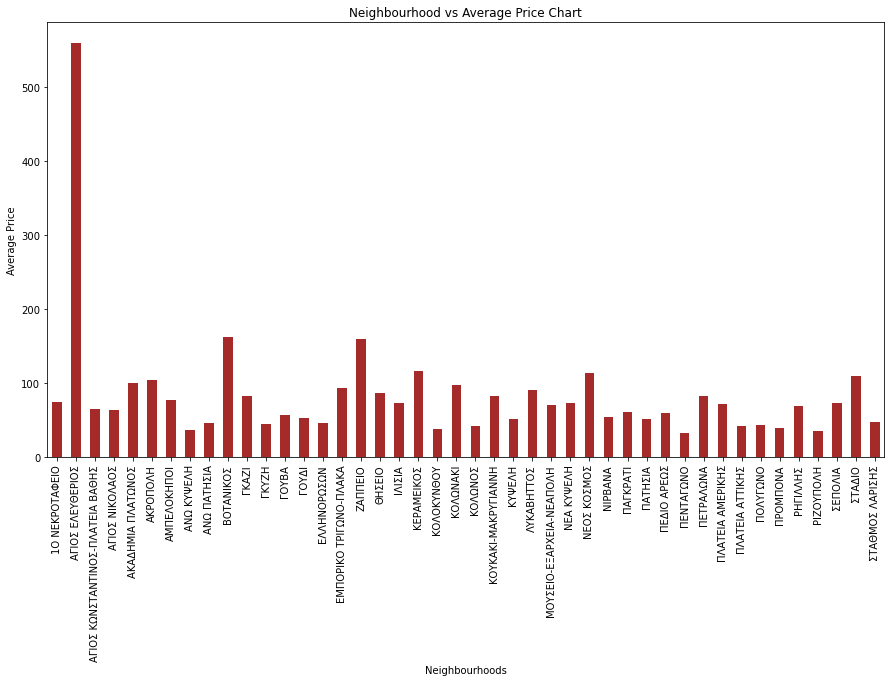

In [7]:
plt.figure(figsize=(15,8))
price_per_neighbourhood.plot(kind='bar', color='brown')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')

Room Type and Average Price comparison.

In [8]:
print(df['room_type'])

0       Entire home/apt
1       Entire home/apt
2       Entire home/apt
3       Entire home/apt
4       Entire home/apt
             ...       
9577    Entire home/apt
9578       Private room
9579    Entire home/apt
9580    Entire home/apt
9581    Entire home/apt
Name: room_type, Length: 9582, dtype: object


In [9]:
price_per_room_type = df.groupby('room_type').price.mean()

In [10]:
price_per_room_type

room_type
Entire home/apt     79.827248
Hotel room         186.536232
Private room       102.434343
Shared room         76.833333
Name: price, dtype: float64

Text(0.5, 1.0, 'Room Type vs Average Price Chart')

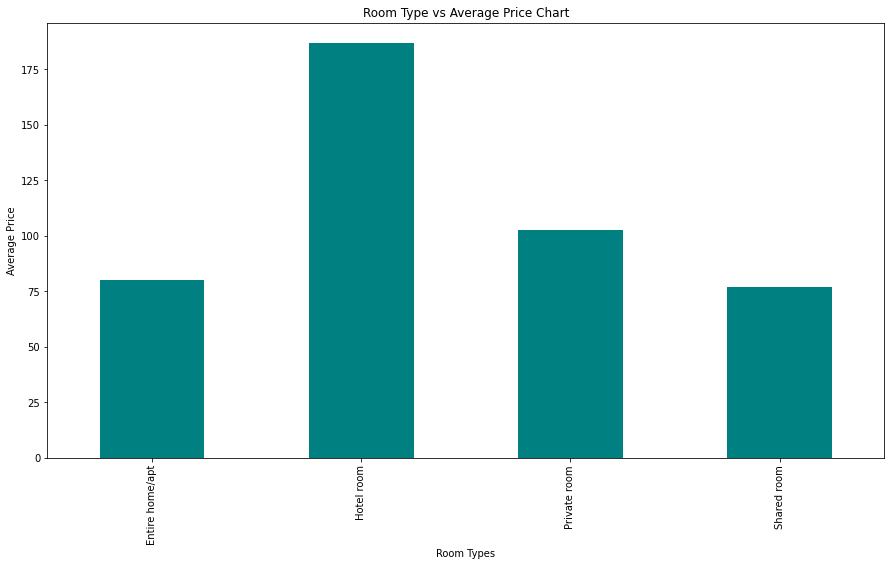

In [11]:
plt.figure(figsize=(15,8))
price_per_room_type.plot(kind='bar', color='teal')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart')

Property Type and Average Price comparison.

In [12]:
print(df['property_type'])

0                Entire rental unit
1                Entire rental unit
2                Entire rental unit
3                Entire rental unit
4                Entire rental unit
                   ...             
9577             Entire rental unit
9578    Private room in rental unit
9579             Entire rental unit
9580             Entire rental unit
9581             Entire rental unit
Name: property_type, Length: 9582, dtype: object


In [13]:
price_per_property_type = df.groupby('property_type').price.mean()

In [14]:
price_per_property_type

property_type
Boat                                   450.000000
Camper/RV                               83.500000
Cycladic house                          71.500000
Earth house                             75.200000
Entire bed and breakfast               120.000000
Entire condominium (condo)              64.099245
Entire cottage                          35.000000
Entire guest suite                      63.666667
Entire guesthouse                       36.428571
Entire home/apt                         40.000000
Entire loft                             84.676829
Entire place                           138.800000
Entire rental unit                      79.078095
Entire residential home                103.743295
Entire serviced apartment              112.826087
Entire townhouse                       205.181818
Entire villa                           294.052632
Farm stay                               70.000000
Floor                                  173.500000
Private room                        

Text(0.5, 1.0, 'Property vs Average Price Chart')

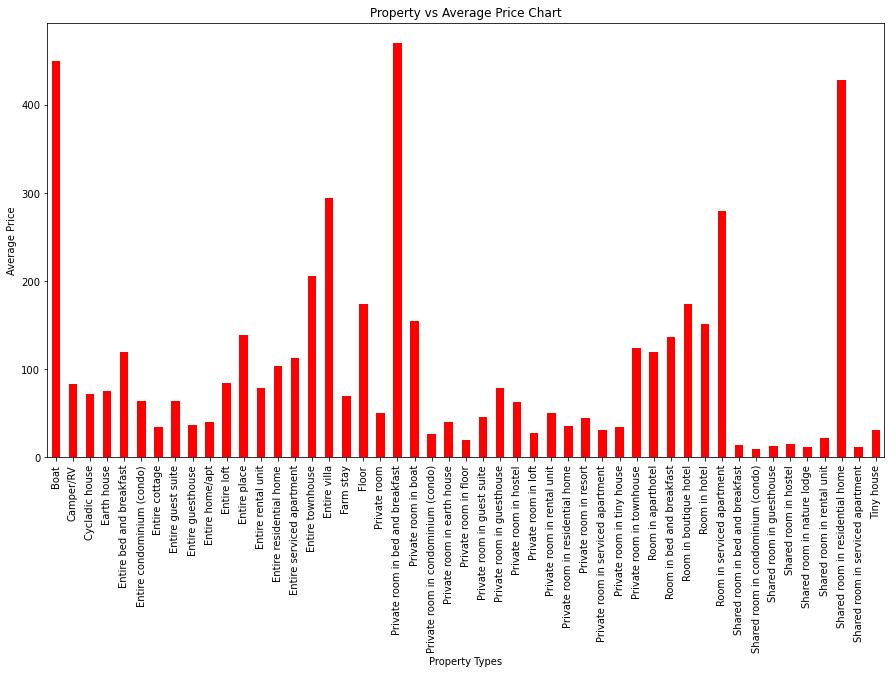

In [15]:
plt.figure(figsize=(15,8))
price_per_property_type.plot(kind='bar', color='red')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart')

# To visualize that which Room Type is most and least expensive and come under which Property Type and Neighbourhood of Athens.


Visualization of Room Type Distributions.

In [16]:
room_type_count = df.room_type.value_counts()

In [17]:
room_type_count

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'Room Type Distribution'}, ylabel='room_type'>

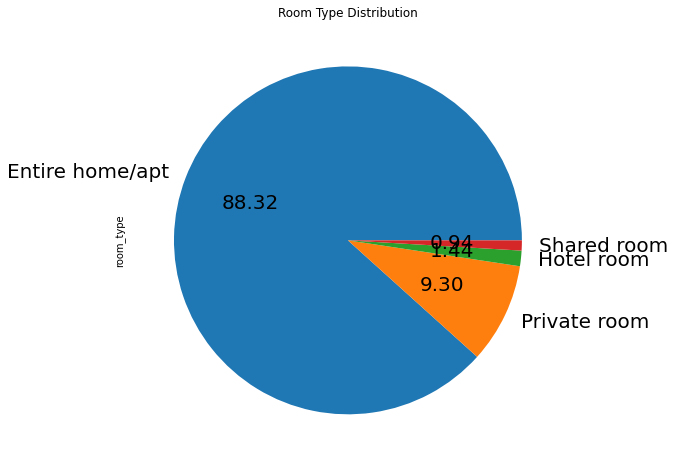

In [18]:
#Pie Chart.
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution')

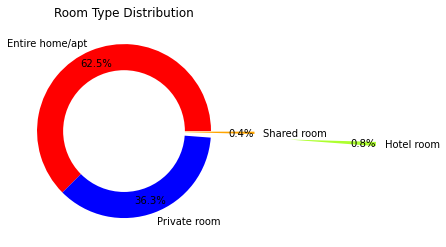

In [19]:
#Donut Chart.
room_type_labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
room_type_counts_labels = [2030, 1180, 25, 14]

colors = ['#FF0000', '#0000FF', '#ADFF2F', '#FFA500']
explode = (0, 0, 1.9, 0.5)
plt.pie(room_type_counts_labels, colors=colors, labels= room_type_labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Room Type Distribution')
plt.show()

Property Type and Room Type compared with Price.

In [20]:
df.property_type.unique()

array(['Entire rental unit', 'Entire loft', 'Private room in rental unit',
       'Entire residential home', 'Entire bed and breakfast',
       'Entire condominium (condo)', 'Entire villa', 'Earth house',
       'Tiny house', 'Private room in residential home',
       'Entire guest suite', 'Entire serviced apartment',
       'Private room in boat', 'Private room in guesthouse',
       'Private room in bed and breakfast',
       'Private room in condominium (condo)', 'Entire guesthouse',
       'Shared room in hostel', 'Entire townhouse',
       'Private room in townhouse', 'Room in hotel',
       'Shared room in rental unit', 'Room in serviced apartment',
       'Entire place', 'Room in aparthotel', 'Floor',
       'Private room in hostel', 'Private room in floor',
       'Shared room in residential home', 'Room in boutique hotel',
       'Boat', 'Private room in guest suite',
       'Private room in serviced apartment', 'Private room',
       'Entire cottage', 'Shared room in guesthou

In [21]:
df = df[df.property_type != 0]

In [22]:
property_type_count = df.property_type.value_counts()

In [23]:
property_type_count

Entire rental unit                     6825
Entire condominium (condo)              927
Private room in rental unit             420
Entire residential home                 261
Entire loft                             164
Room in hotel                           148
Entire serviced apartment               138
Room in aparthotel                      133
Room in boutique hotel                  126
Private room in condominium (condo)      58
Private room in bed and breakfast        47
Room in serviced apartment               39
Shared room in rental unit               35
Private room in residential home         30
Shared room in hostel                    28
Private room in serviced apartment       25
Entire townhouse                         22
Entire guest suite                       21
Entire villa                             19
Shared room in residential home          13
Private room in townhouse                13
Private room in hostel                    9
Shared room in condominium (cond

Text(0, 0.5, 'Number of listings')

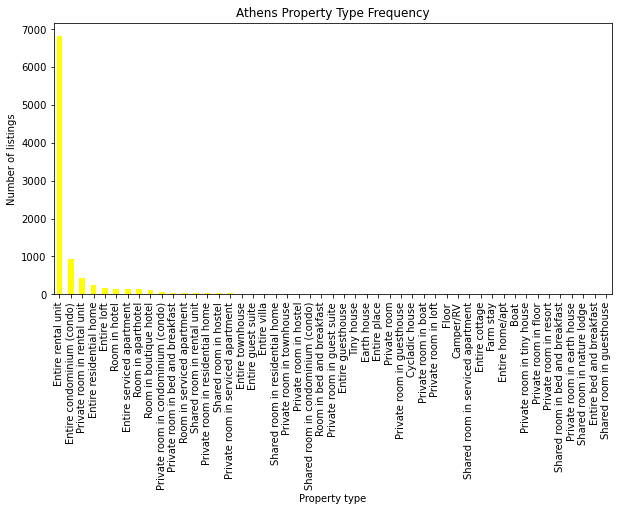

In [24]:
property_type_count.plot.bar(color = 'yellow', figsize =(10,5), title = 'Athens Property Type Frequency')
plt.xlabel('Property type')
plt.ylabel('Number of listings')

In [25]:
prices_data = df.groupby(['property_type','room_type']).price.mean()

In [26]:
prices_data

property_type                        room_type      
Boat                                 Entire home/apt    450.000000
Camper/RV                            Entire home/apt     83.500000
Cycladic house                       Entire home/apt     71.500000
Earth house                          Entire home/apt     75.200000
Entire bed and breakfast             Entire home/apt    120.000000
Entire condominium (condo)           Entire home/apt     64.099245
Entire cottage                       Entire home/apt     35.000000
Entire guest suite                   Entire home/apt     63.666667
Entire guesthouse                    Entire home/apt     36.428571
Entire home/apt                      Entire home/apt     40.000000
Entire loft                          Entire home/apt     84.676829
Entire place                         Entire home/apt    138.800000
Entire rental unit                   Entire home/apt     79.078095
Entire residential home              Entire home/apt    103.743295
Entire se

Text(0.5, 1.0, 'Heatmap between Property Type and Room Type')

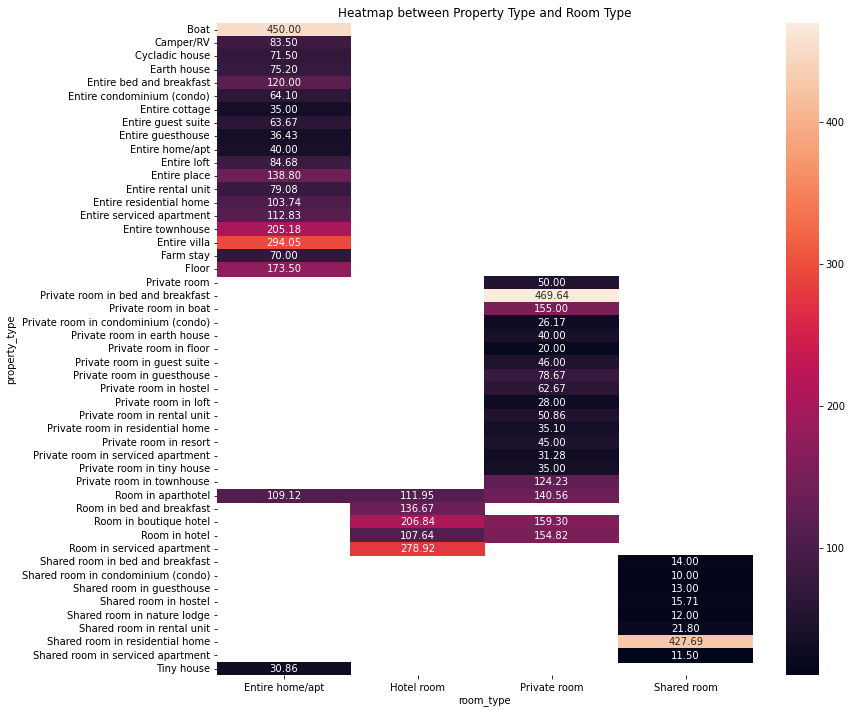

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Property Type and Room Type')

Neighbourhood Cleansed and Room Type compared with Price.

In [28]:
df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed            room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     74.454545
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt    587.100000
                                  Private room        20.000000
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt     59.120155
                                  Hotel room         188.750000
                                                        ...    
ΣΤΑΔΙΟ                            Private room       669.769231
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     50.758065
                                  Hotel room          66.250000
                                  Private room        35.777778
                                  Shared room         11.750000
Name: price, Length: 116, dtype: float64

Text(0.5, 1.0, 'Heatmap between Neighbourhood Cleansed and Room Type')

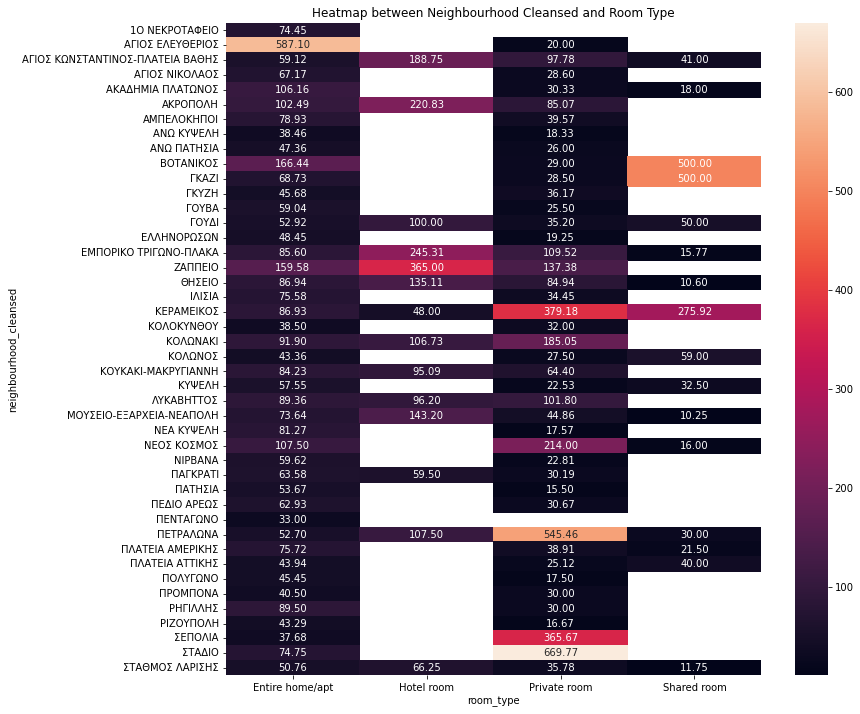

In [29]:
plt.figure(figsize=(12,12));
sns.heatmap(df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Neighbourhood Cleansed and Room Type')

# To visualize that which listing id has good and bad Review Score Ratings on the basis of Neighbourhood, Property Type, Room Type and Bedrooms available in the individuals.


In [30]:
df.review_scores_rating.unique()

array([4.77, 4.86, 4.85, 4.79, 4.76, 4.82,  nan, 4.7 , 4.66, 5.  , 4.75,
       4.89, 4.42, 4.71, 4.6 , 4.5 , 4.8 , 4.95, 4.68, 4.87, 4.67, 4.13,
       4.21, 4.73, 4.61, 4.98, 4.92, 4.3 , 4.04, 4.94, 4.78, 0.  , 4.88,
       4.91, 4.63, 4.56, 4.65, 4.83, 4.93, 4.2 , 4.81, 4.06, 4.97, 4.38,
       4.64, 4.84, 4.57, 4.55, 4.48, 4.72, 4.99, 4.9 , 4.25, 4.74, 4.54,
       4.08, 4.09, 4.11, 4.44, 4.45, 4.  , 4.96, 4.59, 4.53, 4.58, 4.69,
       4.4 , 4.39, 4.33, 2.  , 4.41, 4.46, 4.43, 4.23, 4.49, 4.28, 4.51,
       3.  , 3.5 , 4.52, 4.14, 3.88, 4.62, 1.  , 3.38, 3.57, 3.9 , 4.36,
       4.47, 4.18, 4.31, 4.1 , 3.83, 4.26, 4.32, 3.78, 4.29, 3.89, 4.35,
       4.17, 4.37, 3.75, 4.22, 4.24, 3.67, 4.34, 2.5 , 3.91, 4.15, 3.86,
       3.33, 4.07, 3.6 , 3.53, 4.19, 3.8 , 4.27, 3.4 , 3.71, 1.8 , 3.17,
       3.96, 3.95, 3.82, 4.12, 3.94, 2.33, 3.62, 3.31, 3.27, 2.3 , 3.58,
       3.28, 3.72, 2.86, 3.2 , 3.11, 3.64, 3.25, 3.79, 1.67, 2.25])

In [31]:
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=0)

Review Scores Rating validate with Neighbourhood Cleansed.

In [32]:
ratings_per_neighbourhood = df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [33]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type                      
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ     Entire place                           5.0
ΑΚΡΟΠΟΛΗ                Boat                                   5.0
ΡΙΖΟΥΠΟΛΗ               Entire condominium (condo)             5.0
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ          Entire residential home                5.0
ΠΡΟΜΠΟΝΑ                Private room in rental unit            5.0
                                                              ... 
ΚΥΨΕΛΗ                  Entire serviced apartment              0.0
ΘΗΣΕΙΟ                  Shared room in condominium (condo)     0.0
ΠΕΔΙΟ ΑΡΕΩΣ             Entire place                           0.0
ΚΥΨΕΛΗ                  Shared room in rental unit             0.0
ΓΚΥΖΗ                   Private room in condominium (condo)    0.0
Name: review_scores_rating, Length: 428, dtype: float64

Text(0.5, 1.0, 'Reviews based on neighbourhood and price')

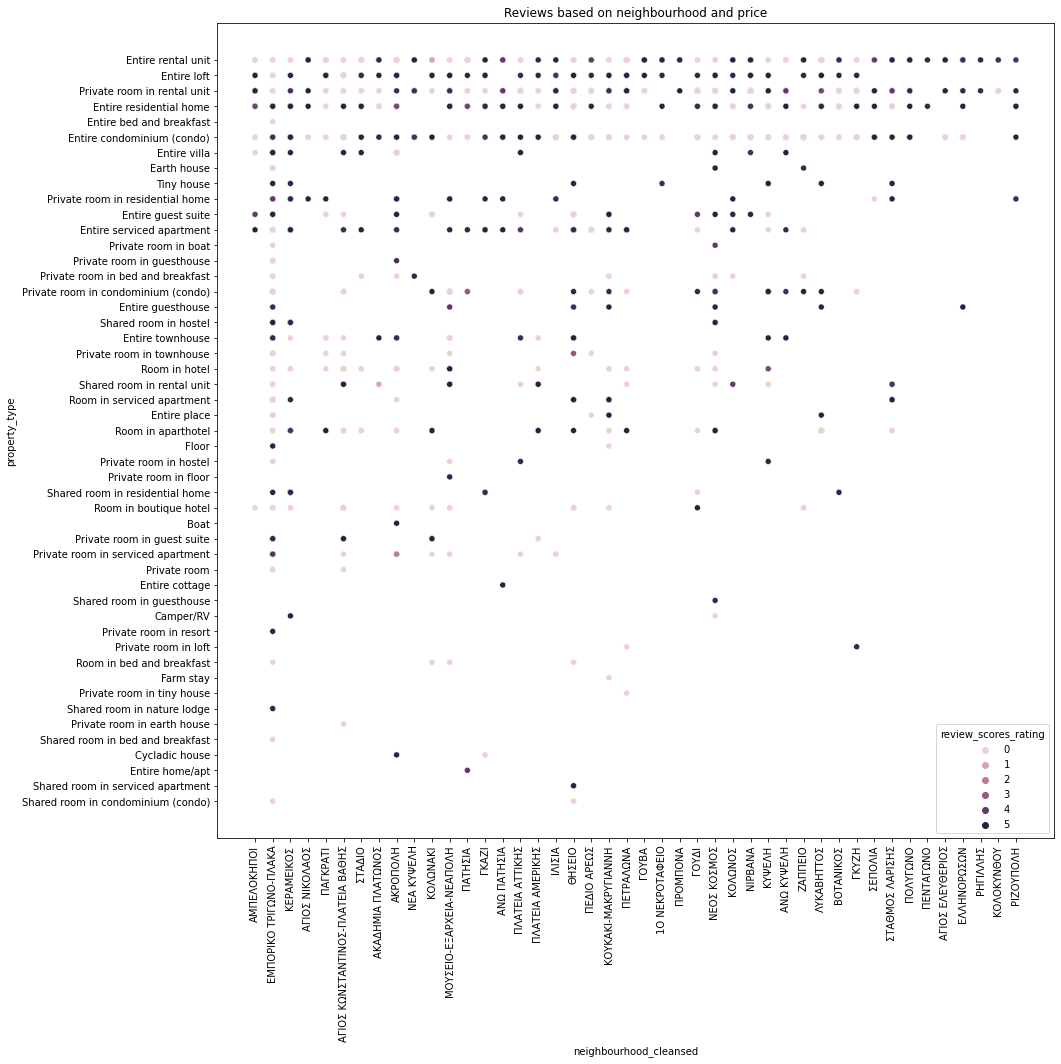

In [34]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=df)
plt.xticks(rotation=90)
plt.title('Reviews based on neighbourhood and price')

Review Scores Rating validate with Property Type.

In [35]:
ratings_per_property_type = df.groupby('property_type').review_scores_rating.mean()

In [36]:
ratings_per_property_type

property_type
Boat                                   5.000000
Camper/RV                              2.475000
Cycladic house                         2.445000
Earth house                            2.944000
Entire bed and breakfast               0.000000
Entire condominium (condo)             3.937066
Entire cottage                         5.000000
Entire guest suite                     2.901429
Entire guesthouse                      4.707143
Entire home/apt                        4.000000
Entire loft                            4.169146
Entire place                           2.912000
Entire rental unit                     4.119429
Entire residential home                3.947126
Entire serviced apartment              2.904783
Entire townhouse                       3.296818
Entire villa                           3.876842
Farm stay                              0.000000
Floor                                  2.470000
Private room                           1.500000
Private room in bed and br

Text(0.5, 1.0, 'Property Type vs Average Rating Chart')

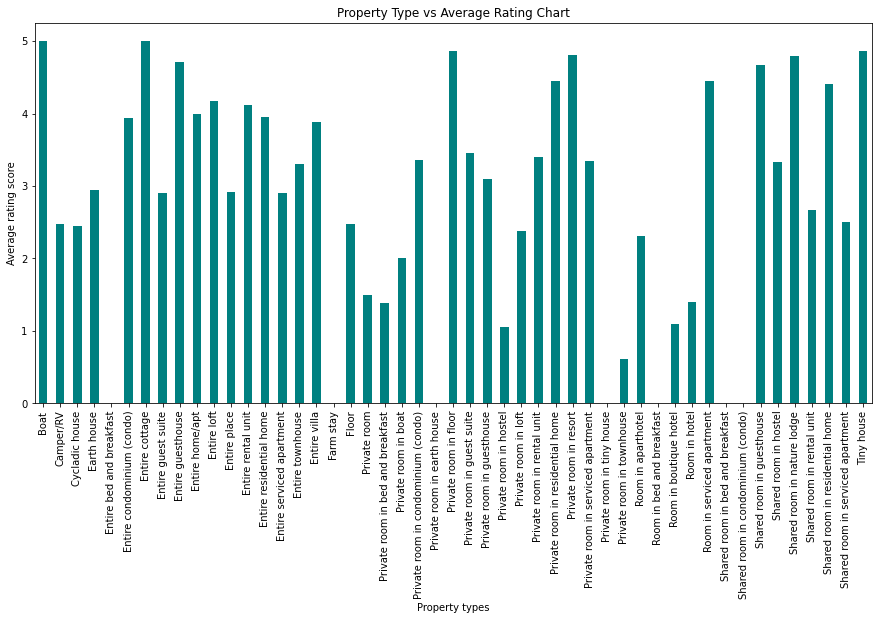

In [37]:
ratings_per_property_type.plot(kind='bar',color='teal', figsize=(15,7))
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart')

Review Scores Rating validate Room Type and Bedrooms.

In [38]:
ratings_per_bedrooms = df.groupby(['room_type', 'bedrooms']).review_scores_rating.mean()

In [39]:
ratings_per_bedrooms

room_type        bedrooms
Entire home/apt  1.0         4.107174
                 2.0         3.959679
                 3.0         4.035282
                 4.0         4.025159
                 5.0         4.645000
                 6.0         4.092500
                 7.0         2.250000
                 9.0         5.000000
                 10.0        3.946000
                 12.0        4.670000
Hotel room       1.0         1.751373
                 2.0         3.550667
                 3.0         4.780000
                 4.0         5.000000
                 5.0         5.000000
Private room     1.0         2.678906
                 2.0         2.560857
                 3.0         4.302222
                 4.0         1.750000
                 5.0         1.915000
Shared room      1.0         2.869556
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Room_type, Bedrooms vs Average Rating Chart')

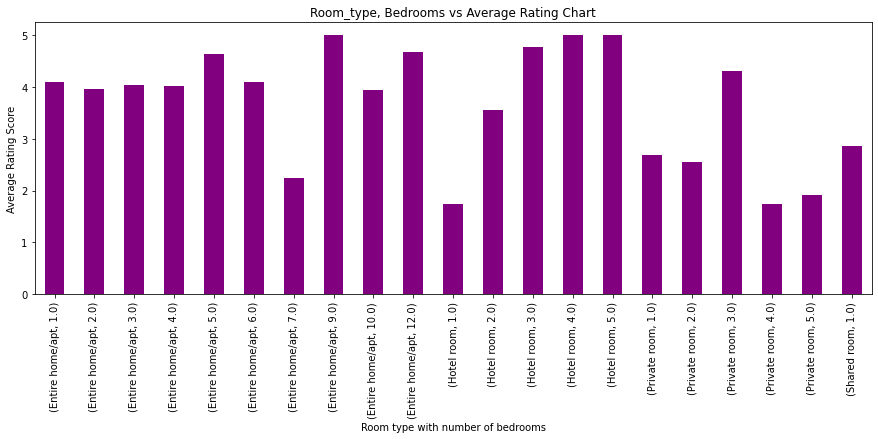

In [40]:
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='purple')
plt.xlabel('Room type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Room_type, Bedrooms vs Average Rating Chart')

# Data Pre-Processing

# Data Cleaning, Feature Engineering, Data Reduction, Data Transformation and EDA

# To predict and validate the price using different algorithms.

In [41]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.82,4.82,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.83,4.83,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,20211025162728,2021-10-26,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.23


In [42]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [43]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1708
Length: 74, dtype: int64

In [44]:
df.isnull().sum().sum()

66558

In [45]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.582000e+03,9.582000e+03,9.582000e+03,9579.000000,9579.000000,0.0,9582.000000,9582.000000,9582.000000,0.0,...,7843.000000,7843.000000,7843.000000,7843.000000,7842.000000,9582.000000,9582.000000,9582.000000,9582.000000,7874.000000
mean,3.189967e+07,2.021103e+13,1.437052e+08,17.809375,17.809375,NaN,37.979937,23.731852,3.829159,NaN,...,4.780343,4.868470,4.863668,4.731201,4.740870,11.083072,9.933312,0.920685,0.097683,1.860970
std,1.331709e+07,0.000000e+00,1.153289e+08,60.121461,60.121461,NaN,0.013226,0.012372,1.959972,NaN,...,0.395103,0.337234,0.361109,0.418156,0.393346,23.451291,23.081999,4.082871,1.015924,2.049245
min,1.059500e+04,2.021103e+13,3.717700e+04,0.000000,0.000000,NaN,37.950550,23.697700,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.251695e+07,2.021103e+13,3.849921e+07,1.000000,1.000000,NaN,37.969223,23.724032,2.000000,NaN,...,4.740000,4.870000,4.880000,4.650000,4.690000,1.000000,1.000000,0.000000,0.000000,0.430000
50%,3.278173e+07,2.021103e+13,1.288502e+08,3.000000,3.000000,NaN,37.978386,23.729830,4.000000,NaN,...,4.900000,4.960000,4.970000,4.860000,4.830000,3.000000,2.000000,0.000000,0.000000,1.200000
75%,4.264848e+07,2.021103e+13,2.244519e+08,11.000000,11.000000,NaN,37.987960,23.737930,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.940000,9.000000,8.000000,0.000000,0.000000,2.640000
max,5.296030e+07,2.021103e+13,4.281993e+08,2095.000000,2095.000000,NaN,38.032430,23.780220,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,156.000000,156.000000,43.000000,14.000000,28.000000


In [46]:
df = df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [47]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,10595,37.988630,23.765270,Entire home/apt,8,3.0,79.0,32
1,10990,37.989030,23.764480,Entire home/apt,4,1.0,50.0,52
2,10993,37.988880,23.764730,Entire home/apt,2,NaN,38.0,71
3,10995,37.989030,23.764480,Entire home/apt,4,1.0,48.0,24
4,27262,37.989240,23.765000,Entire home/apt,4,1.0,47.0,17
...,...,...,...,...,...,...,...,...
9577,52959003,37.976986,23.728438,Entire home/apt,2,NaN,10.0,0
9578,52959885,37.955988,23.731117,Private room,3,1.0,31.0,0
9579,52959925,37.985283,23.723520,Entire home/apt,13,4.0,65.0,0
9580,52960132,37.987990,23.730460,Entire home/apt,16,3.0,79.0,0


In [48]:
df.isnull().sum()

id                     0
latitude               0
longitude              0
room_type              0
accommodates           0
bedrooms             813
price                  0
number_of_reviews      0
dtype: int64

In [49]:
df.isnull().sum().sum()

813

In [50]:
df[['bedrooms']] = df[['bedrooms']].fillna(value=0)

In [51]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,10595,37.988630,23.765270,Entire home/apt,8,3.0,79.0,32
1,10990,37.989030,23.764480,Entire home/apt,4,1.0,50.0,52
2,10993,37.988880,23.764730,Entire home/apt,2,0.0,38.0,71
3,10995,37.989030,23.764480,Entire home/apt,4,1.0,48.0,24
4,27262,37.989240,23.765000,Entire home/apt,4,1.0,47.0,17
...,...,...,...,...,...,...,...,...
9577,52959003,37.976986,23.728438,Entire home/apt,2,0.0,10.0,0
9578,52959885,37.955988,23.731117,Private room,3,1.0,31.0,0
9579,52959925,37.985283,23.723520,Entire home/apt,13,4.0,65.0,0
9580,52960132,37.987990,23.730460,Entire home/apt,16,3.0,79.0,0


Text(0.5, 1.0, 'Price Frequency')

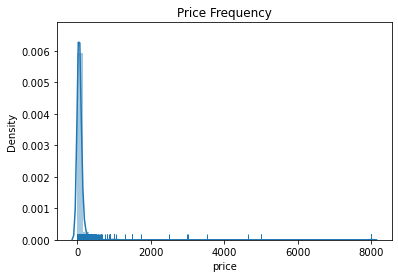

In [52]:
sns.distplot(df['price'], rug = True)
plt.title('Price Frequency')

In [53]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [54]:
df.room_type.value_counts()

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

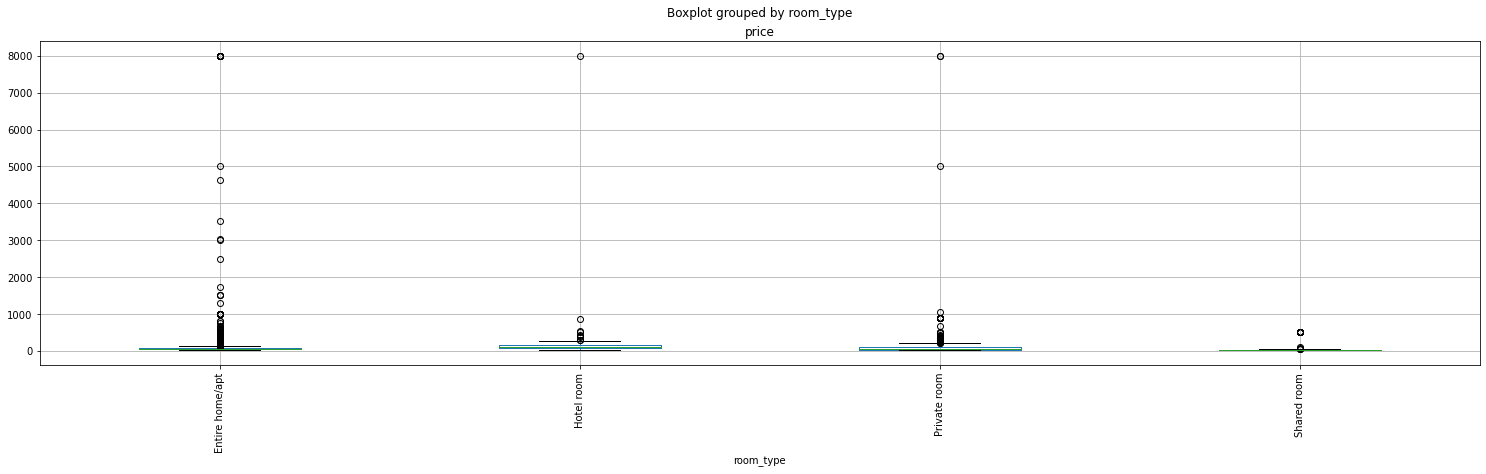

In [55]:
df.boxplot(column='price', by = 'room_type', figsize=(25,6), rot = 90)

Text(0.5, 1.0, 'Longitude & Latitude along with Price')

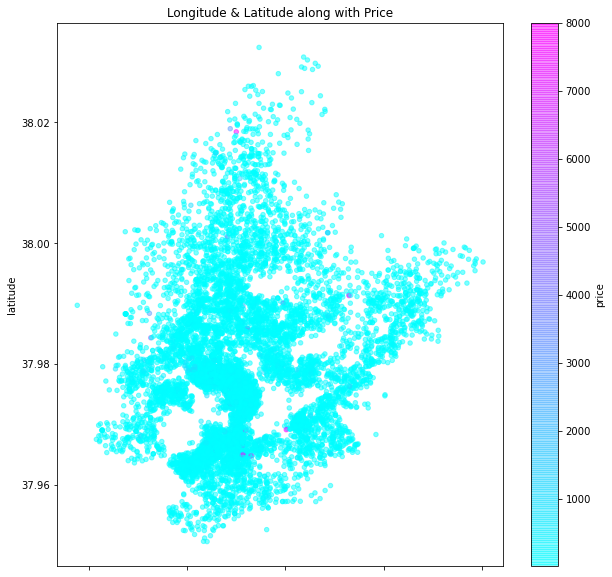

In [56]:
df.plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude & Latitude along with Price')

Text(0.5, 1.0, 'Longitude and Latitude along with Price < 200')

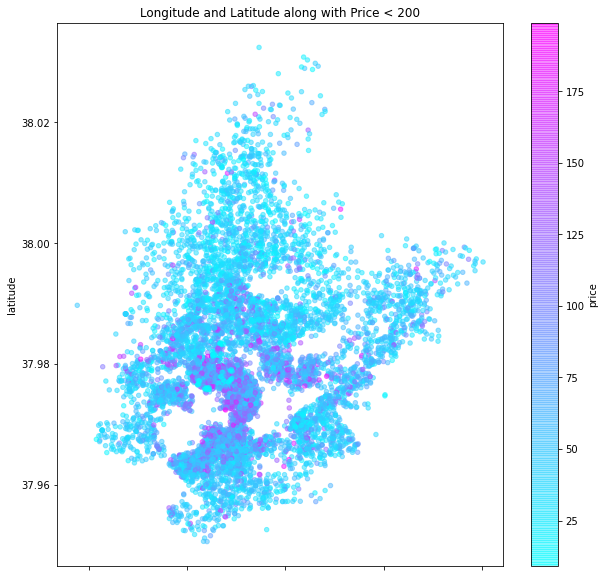

In [57]:
df[df['price']<200].plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude and Latitude along with Price < 200')

In [58]:
import folium
from folium import plugins
from folium.plugins import HeatMap

Greece = folium.Map(location=[37.98376, 23.72784], zoom_start = 3)
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(Greece)
Greece

Text(0.5, 1.0, 'Price vs Number of Reviews')

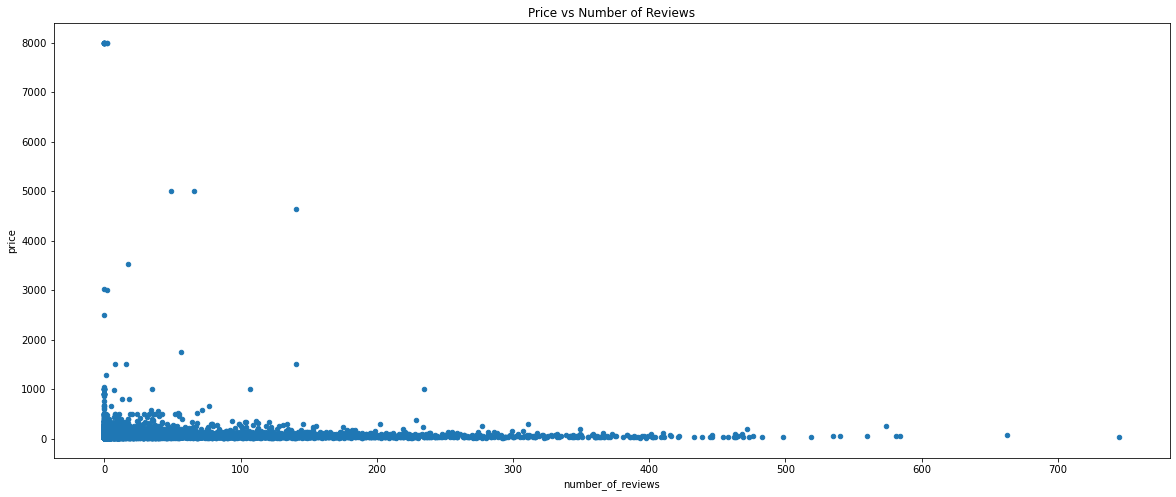

In [59]:
df.plot.scatter(x = 'number_of_reviews', y = 'price', figsize=(20,8))
plt.title('Price vs Number of Reviews')

Text(0.5, 1.0, 'Price vs log(reviews)')

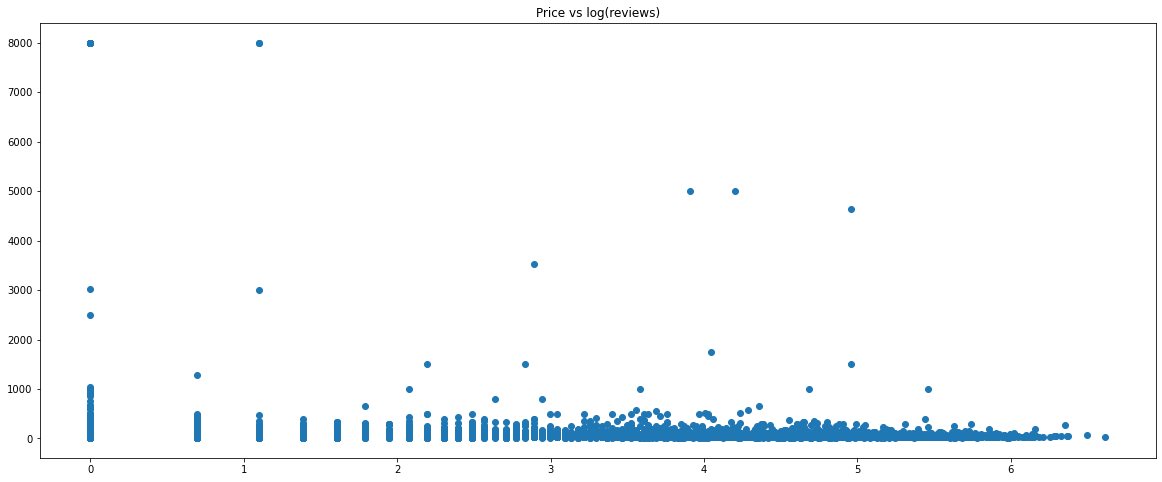

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+df['number_of_reviews']), df['price'])
plt.title('Price vs log(reviews)')

Text(0.5, 1.0, 'Price vs Bedrooms')

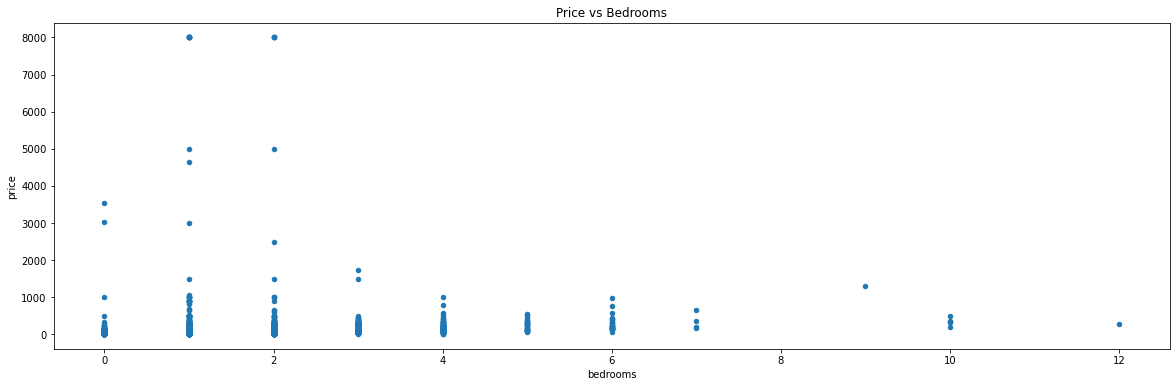

In [61]:
df.plot.scatter(x = 'bedrooms', y = 'price', figsize=(20,6))
plt.title('Price vs Bedrooms') 

Text(0.5, 1.0, 'Price vs Accomodates')

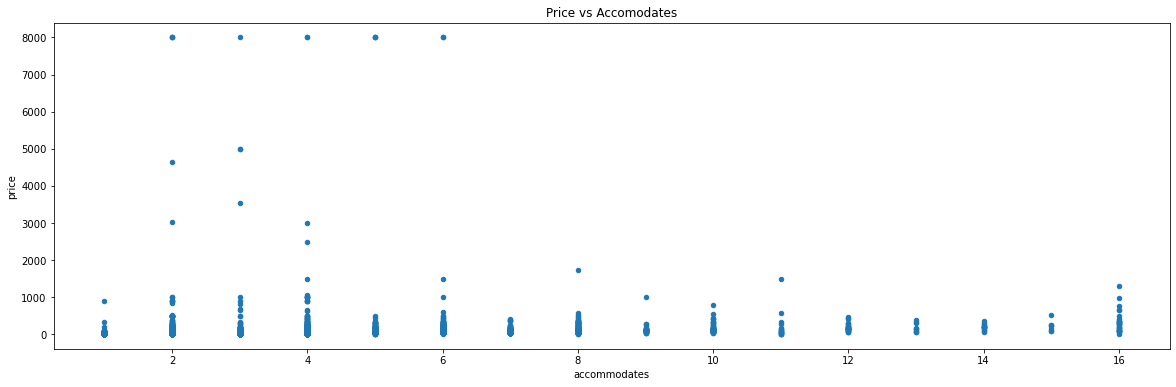

In [62]:
df.plot.scatter(x = 'accommodates', y = 'price', figsize=(20,6))
plt.title('Price vs Accomodates') 

In [63]:
df['logreviews'] = np.log(1 + df['number_of_reviews'])

In [64]:
df.head()

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews,logreviews
0,10595,37.98863,23.76527,Entire home/apt,8,3.0,79.0,32,3.496508
1,10990,37.98903,23.76448,Entire home/apt,4,1.0,50.0,52,3.970292
2,10993,37.98888,23.76473,Entire home/apt,2,0.0,38.0,71,4.276666
3,10995,37.98903,23.76448,Entire home/apt,4,1.0,48.0,24,3.218876
4,27262,37.98924,23.76500,Entire home/apt,4,1.0,47.0,17,2.890372


In [65]:
df.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'price', 'number_of_reviews', 'logreviews'],
      dtype='object')

Text(0.5, 1.0, 'Correlogram between Features')

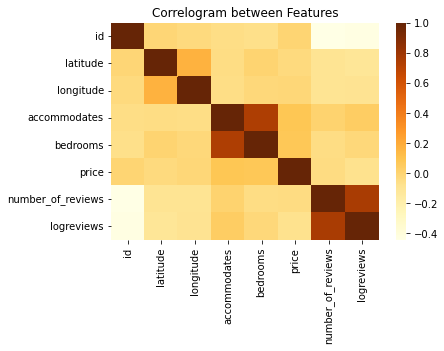

In [66]:
corr1=df.corr()
sns.heatmap(corr1, cmap="YlOrBr")
plt.title('Correlogram between Features')

Text(0.5, 1.0, 'Correlation between Features')

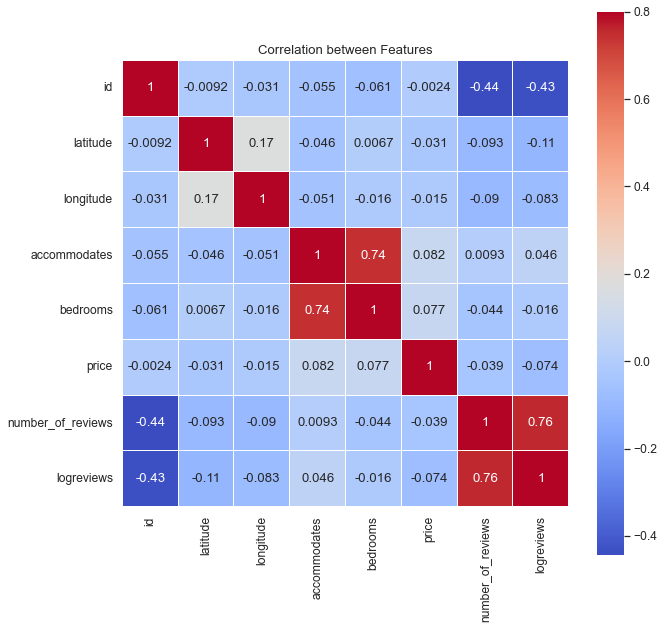

In [67]:
corrMatrix=df[['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'price', 'number_of_reviews', 'logreviews']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="white")
plt.title('Correlation between Features')

In [68]:
data = df.copy()
print('amount of original data:' + str(len(data)))

amount of original data:9582


In [69]:
data = pd.get_dummies(data)
data.head()

,id,latitude,longitude,accommodates,bedrooms,price,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,10595,37.98863,23.76527,8,3.0,79.0,32,3.496508,1,0,0,0
1,10990,37.98903,23.76448,4,1.0,50.0,52,3.970292,1,0,0,0
2,10993,37.98888,23.76473,2,0.0,38.0,71,4.276666,1,0,0,0
3,10995,37.98903,23.76448,4,1.0,48.0,24,3.218876,1,0,0,0
4,27262,37.98924,23.76500,4,1.0,47.0,17,2.890372,1,0,0,0


In [70]:
data.columns

Index(['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'price',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [71]:
X = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y = data['price']

# Multi-Linear Regression 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7665, 9), (1917, 9), (7665,), (1917,))

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)
print(regressor)

Intercept:  120.21854633023172
Coefficients:  [-7.48014574e-07  1.18354491e+01  8.04500774e+00  1.46603837e-01
 -1.84228466e+01 -3.30851184e+01  6.63290320e+01 -2.15086694e+00
 -3.10930466e+01]
LinearRegression()


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([ 78.70523206, 197.88285103,  71.38441002, ...,  49.30067717,
        32.5580679 ,  42.37827115])

In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
9224,38.0,78.705232
3464,139.0,197.882851
6984,35.0,71.384410
4132,65.0,82.627610
4955,48.0,41.445890
...,...,...
3509,98.0,80.227066
3334,28.0,28.167426
2260,45.0,49.300677
7695,35.0,32.558068


In [79]:
#Accuracy of the model.
r2_score(y_test, y_pred)

0.012864106586053525

In [80]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 54.33148466160608
Mean Squared Error: 83362.50711283894
Root Mean Squared Error: 288.72566064144513


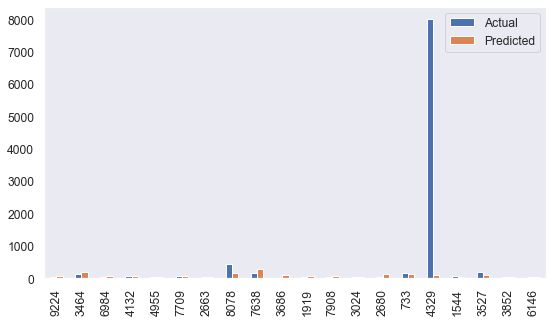

In [81]:
#first20pred
df2 = df1.head(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

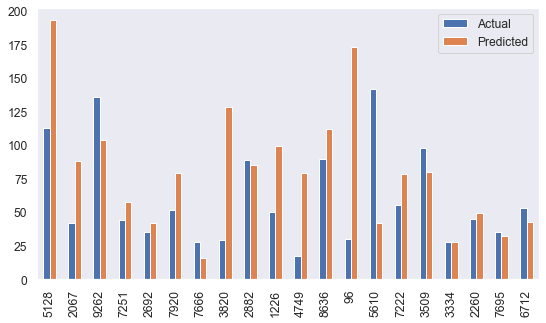

In [82]:
#last20pred
df2 = df1.tail(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# K-Nearest Neighbor Classification

In [83]:
conditions = [
    (data['price'] < 100.0),
    (data['price'] >= 100.0) & (data['price'] < 250.0),
    (data['price'] >= 250.0) & (data['price'] < 600.0),
    (data['price'] >= 600.0) ]

values = ['economic', 'low-mid', 'high-mid','high']

data['price_range'] = np.select(conditions, values)

In [84]:
data['price_range'].value_counts()

economic    7979
low-mid     1337
high-mid     209
high          57
Name: price_range, dtype: int64

In [85]:
labelencoder = LabelEncoder()
data['price_range_category'] = labelencoder.fit_transform(data['price_range'])

In [86]:
df3 = data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [87]:
df3.corr().style.background_gradient(cmap='magma')

,id,accommodates,bedrooms,price,price_range_category,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,1.000000,-0.054826,-0.061231,-0.002356,0.005613,-0.444224,-0.430305,-0.045396,0.002993,0.031605,0.052294
accommodates,-0.054826,1.000000,0.744313,0.081760,0.280865,0.009286,0.045710,0.236077,-0.037733,-0.220722,-0.074870
bedrooms,-0.061231,0.744313,1.000000,0.077357,0.274092,-0.043978,-0.016401,0.122875,-0.042096,-0.104920,-0.041229
price,-0.002356,0.081760,0.077357,1.000000,0.156219,-0.038618,-0.074442,-0.033151,0.041606,0.020305,-0.002147
price_range_category,0.005613,0.280865,0.274092,0.156219,1.000000,-0.092429,-0.162533,-0.093280,0.113225,0.063513,-0.020495
number_of_reviews,-0.444224,0.009286,-0.043978,-0.038618,-0.092429,1.000000,0.758148,0.107040,-0.059432,-0.078389,-0.046971
logreviews,-0.430305,0.045710,-0.016401,-0.074442,-0.162533,0.758148,1.000000,0.225318,-0.110102,-0.181385,-0.068098
room_type_Entire home/apt,-0.045396,0.236077,0.122875,-0.033151,-0.093280,0.107040,0.225318,1.000000,-0.332436,-0.880544,-0.267787
room_type_Hotel room,0.002993,-0.037733,-0.042096,0.041606,0.113225,-0.059432,-0.110102,-0.332436,1.000000,-0.038705,-0.011771
room_type_Private room,0.031605,-0.220722,-0.104920,0.020305,0.063513,-0.078389,-0.181385,-0.880544,-0.038705,1.000000,-0.031178


In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)

X1 = df3.iloc[:, :-1].values
y1 = df3['price_range_category'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred1 = neigh.predict(X_test)

In [90]:
KNNmod = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
KNNmod

,Actual,Predicted
0,0,0
1,3,3
2,0,0
3,0,0
4,0,0
...,...,...
1912,0,0
1913,0,0
1914,0,0
1915,0,0


In [91]:
#Accuracy of the model.
print(neigh.score(X_test, y_test)) 

0.9953051643192489


In [92]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.004694835680751174
Mean Squared Error: 0.004694835680751174
Root Mean Squared Error: 0.06851887098275317


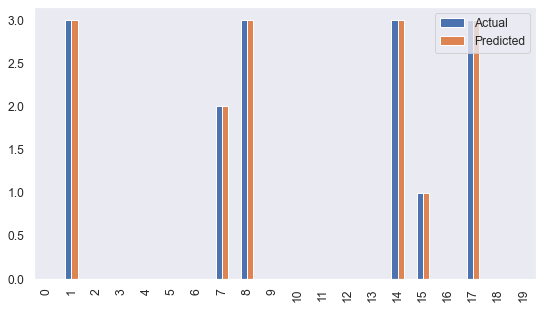

In [93]:
#first20pred
df4 = KNNmod.head(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

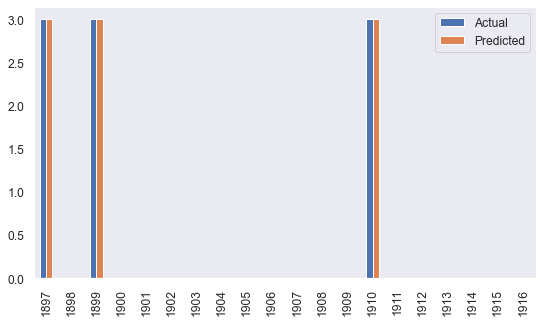

In [94]:
#last20pred
df4 = KNNmod.tail(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
print(classification_report(y_test, y_pred1, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      0.80      0.89        10
           2       0.95      0.85      0.90        47
           3       0.97      1.00      0.99       250

    accuracy                           1.00      1917
   macro avg       0.98      0.91      0.94      1917
weighted avg       1.00      1.00      1.00      1917



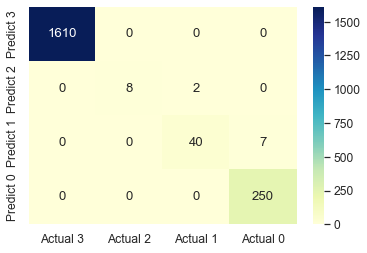

In [96]:
cm = confusion_matrix(y_test, y_pred1)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [97]:
y_pred1 = neigh.predict(X_test)

In [98]:
len(y_pred1)

1917

In [99]:
y_pred1

array([0, 3, 0, ..., 0, 0, 0])

In [100]:
y_prob_pred = neigh.predict_proba(X_test)

In [101]:
len(y_prob_pred)

1917

In [102]:
y_prob_pred

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [103]:
#AUC ROC Score.
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9845565667276001

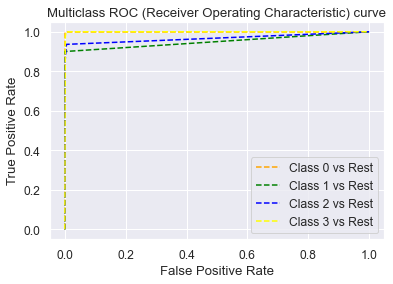

In [104]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

Text(0.5, 1.0, 'Outliers')

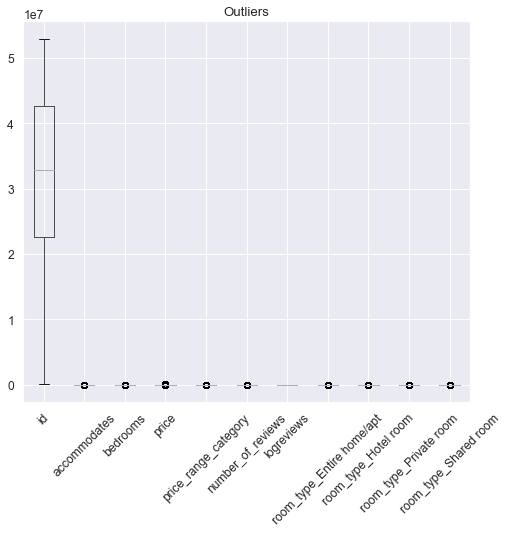

In [105]:
boxplot1 = df3.boxplot(figsize=(8,7),rot=45)
plt.title('Outliers')

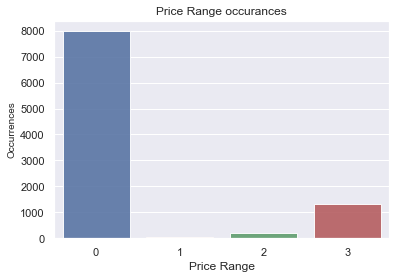

In [106]:
prange_count = df3['price_range_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prange_count.index, prange_count.values, alpha=0.9)
plt.title('Price Range occurances')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Price Range', fontsize=12)
plt.show()

#  Naive Bayes Classification

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2_train = gnb.predict(X_train)
y_pred2_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [108]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2_test.flatten()})
df5

,Actual,Predicted
0,0,0
1,3,3
2,0,0
3,0,0
4,0,0
...,...,...
1912,0,0
1913,0,0
1914,0,0
1915,0,0


In [109]:
#Accuracy of the model.
accuracy_score(y_test, y_pred2_test)

1.0

In [110]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


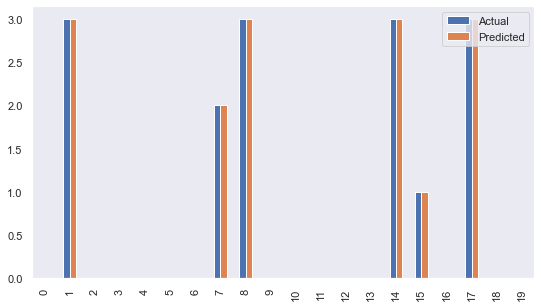

In [111]:
#first20pred
df6 = df5.head(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

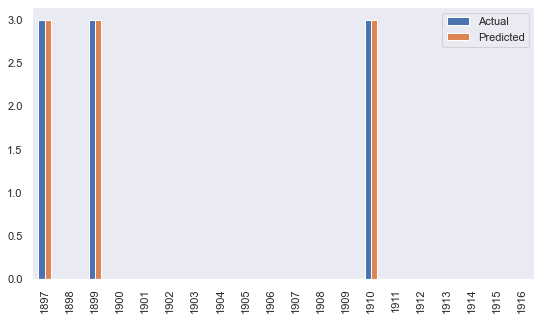

In [112]:
#last20pred
df6 = df5.tail(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [113]:
print(classification_report(y_test, y_pred2_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00       250

    accuracy                           1.00      1917
   macro avg       1.00      1.00      1.00      1917
weighted avg       1.00      1.00      1.00      1917



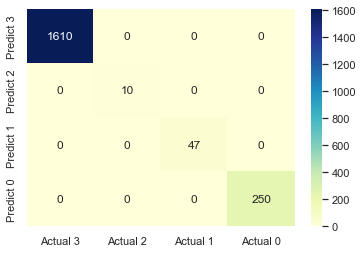

In [114]:
cm = confusion_matrix(y_test, y_pred2_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [115]:
y_pred2_test = gnb.predict(X_test)

In [116]:
len(y_pred2_test)

1917

In [117]:
y_pred2_test

array([0, 3, 0, ..., 0, 0, 0])

In [118]:
y_prob_pred1 = gnb.predict_proba(X_test)

In [119]:
y_prob_pred1

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [120]:
len(y_prob_pred1)

1917

In [121]:
a = np.array(y_prob_pred1)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
b

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [122]:
#AUC ROC Score.
roc_auc_score(y_pred2_test, b, multi_class='ovo', average='weighted')

1.0

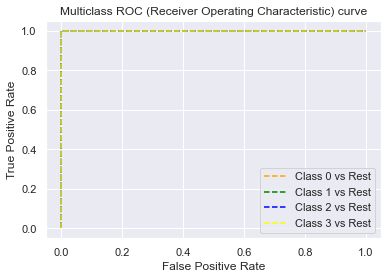

In [123]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred2_test, y_prob_pred1[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred3_train = clf.predict(X_train)
y_pred3_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [125]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3_test.flatten()})
df7

,Actual,Predicted
0,0,0
1,3,3
2,0,0
3,0,0
4,0,0
...,...,...
1912,0,0
1913,0,0
1914,0,0
1915,0,0


In [126]:
#Accuracy of the model.
accuracy_score(y_test, y_pred3_test)

1.0

In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


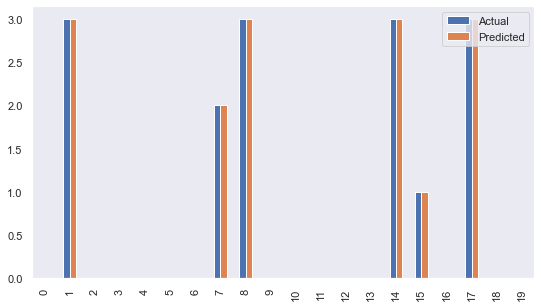

In [128]:
#first20pred
df8 = df7.head(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

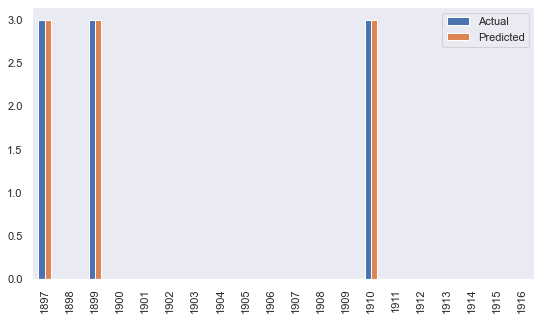

In [129]:
#last20pred
df8 = df7.tail(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
print(classification_report(y_test, y_pred3_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1610
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00       250

    accuracy                           1.00      1917
   macro avg       1.00      1.00      1.00      1917
weighted avg       1.00      1.00      1.00      1917



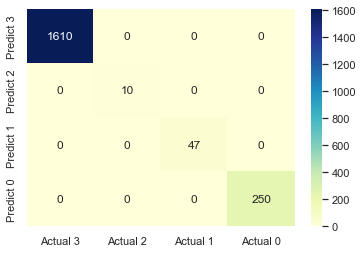

In [131]:
cm = confusion_matrix(y_test, y_pred3_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [132]:
y_pred3_test = clf.predict(X_test)

In [133]:
#AUC ROC Score.
y_prob_pred2 = clf.predict_proba(X_test)
roc_auc_score(y_pred3_test, y_prob_pred2, multi_class='ovo', average='weighted')

1.0

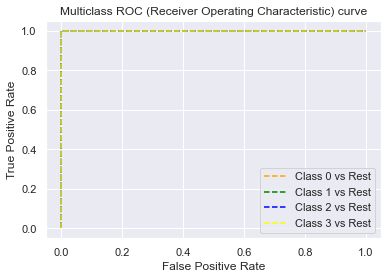

In [134]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred3_test, y_prob_pred2[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Decision Tree Classification

In [135]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
X2 = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y2 = data['price_range_category']
X_train,X_test,y_train,y_test=train_test_split(X2, y2, test_size=0.20, random_state=42)

In [136]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 0.7945


In [137]:
Treedata=data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [138]:
from sklearn import tree
from sklearn.tree import plot_tree

feature_cols = ['id', 'accommodates', 'bedrooms',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']
X3 = Treedata[feature_cols].values # Features
y3 = Treedata.price_range_category.values # Target variable

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20,random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred5 = clf.predict(X_test)

In [141]:
print("Accuracy:", accuracy_score(y_test, y_pred5))

Accuracy: 0.009389671361502348


In [142]:
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred5))

Root Mean Squared Error: 1.646322378716745


In [143]:
Treecls = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5.flatten()})
Treecls

,Actual,Predicted
0,0,1
1,3,1
2,0,2
3,0,1
4,0,1
...,...,...
1912,0,1
1913,0,1
1914,0,2
1915,0,1


In [144]:
#Accuracy of the model.
accuracy_score(y_test, y_pred5)

0.009389671361502348

In [145]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 1.2008346374543557
Mean Squared Error: 1.646322378716745
Root Mean Squared Error: 1.2830909471727812


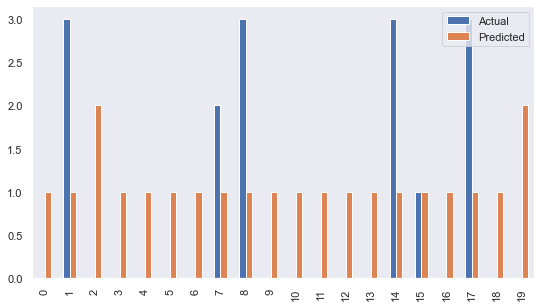

In [146]:
#first20pred
df9 = Treecls.head(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

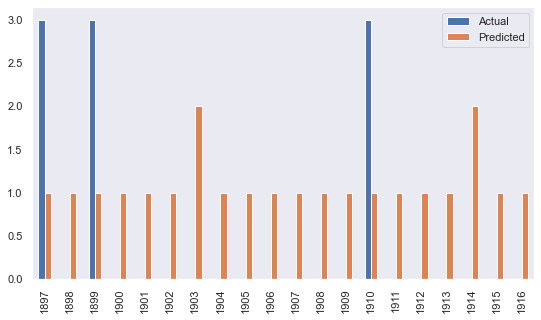

In [147]:
#last20pred
df9 = Treecls.tail(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print(classification_report(y_test, y_pred5, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.62      0.00      0.01      1610
           1       0.01      1.00      0.01        10
           2       0.00      0.00      0.00        47
           3       0.12      0.01      0.02       250

    accuracy                           0.01      1917
   macro avg       0.19      0.25      0.01      1917
weighted avg       0.54      0.01      0.01      1917



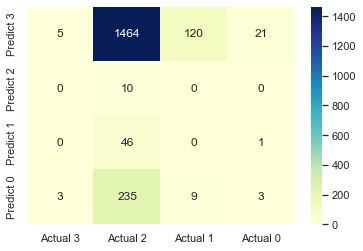

In [149]:
cm = confusion_matrix(y_test, y_pred5)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [150]:
y_pred5 = dt.predict(X_test)

In [151]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred5, y_prob_pred3, multi_class='ovo', average='weighted')

1.0

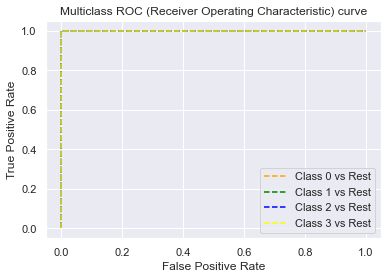

In [152]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred5, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

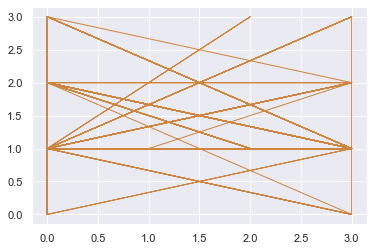

In [153]:
a=Treecls.Actual
b=Treecls.Predicted
plt.plot(a, b, color='peru', linewidth=1)
plt.show()

# Ensembling (Voting Classification)

In [154]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', neigh), ('Random Forest', clf), ('Decision Tree', dt), ('Naive Bayes', gnb)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9007
Testing Accuracy score: 0.8534


In [155]:
y_pred6 = vc.predict(X_test)

In [156]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6.flatten()})
df10

,Actual,Predicted
0,0,0
1,3,3
2,0,0
3,0,0
4,0,0
...,...,...
1912,0,0
1913,0,0
1914,0,0
1915,0,0


In [157]:
#Accuracy of the model.
accuracy_score(y_test, y_pred6)

0.8534167970787689

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 0.4016692749087115
Mean Squared Error: 1.1455399061032865
Root Mean Squared Error: 1.0702989797730755


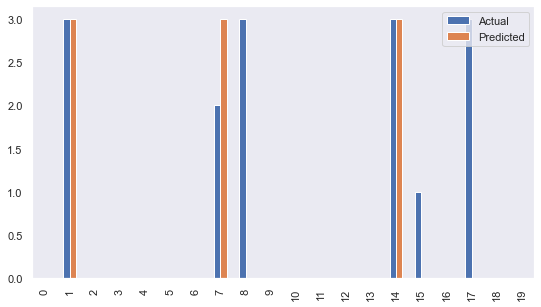

In [159]:
#first20pred
df11 = df10.head(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

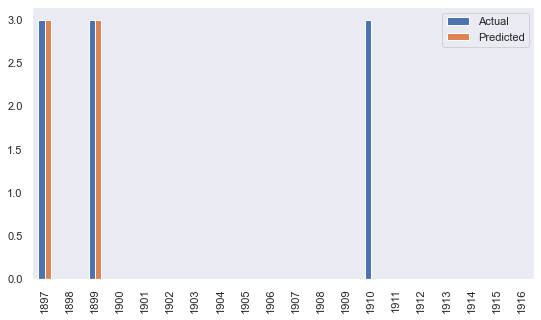

In [160]:
#last20pred
df11 = df10.tail(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
print(classification_report(y_test, y_pred6, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1610
           1       0.50      0.20      0.29        10
           2       0.44      0.09      0.14        47
           3       0.66      0.15      0.25       250

    accuracy                           0.85      1917
   macro avg       0.62      0.36      0.40      1917
weighted avg       0.82      0.85      0.81      1917



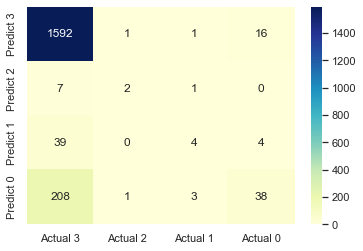

In [162]:
cm = confusion_matrix(y_test, y_pred6)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [163]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred6, y_prob_pred3, multi_class='ovo', average='weighted')

0.9505398107071285

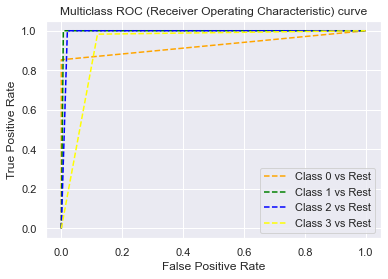

In [164]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred6, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 